In [24]:
import pandas as pd
import networkx as nx

In [2]:
df = pd.read_csv("authorships_15_20_only.csv")

In [3]:
df.head()

,id_article,author,year
0,tr/meltdown/s18,Paul Kocher,2018
1,tr/meltdown/s18,Daniel Genkin,2018
2,tr/meltdown/s18,Daniel Gruss,2018
3,tr/meltdown/s18,Werner Haas 0004,2018
4,tr/meltdown/s18,Mike Hamburg,2018


In [4]:
df["year"] = df["year"].astype(int)

In [5]:
def clean_text(x):
    x = x.lower()
    x = x.replace("-"," ")
    x = x.replace("_"," ")
    return x

In [6]:
df["author"] = df["author"].map(lambda x:clean_text(x))

In [7]:
autores  = ["David Flores Peñaloza","Francisco Hernández Quiroz","Vladislav Khartchenko",
            "Luis A. Pineda Cortés","Sergio Rajsbaum Gorodesky", " David Rosenblueth",
            "Jorge Urrutia Galicia","Armando Castañeda Rojano","Ricardo Strausz",
            "Carlos Velarde Velázquez","Fernando Gamboa R."]

In [8]:
autores  = ["David Flores Peñaloza","Francisco Hernández Quiroz","Vladislav Khartchenko",
            "Luis Alberto Pineda","Sergio Rajsbaum", " David A. Rosenblueth",
            "Jorge Urrutia","Armando Castañeda","Ricardo Strausz","Carlos Velarde"]

In [9]:
lst_df_autores = []
for autor in autores:
    print(autor)
    autor = clean_text(autor)
    data = df.copy()
    for s in autor.split():
        data = data[data["author"].str.contains(s)]
    lst_df_autores.append(data)

David Flores Peñaloza
Francisco Hernández Quiroz
Vladislav Khartchenko
Luis Alberto Pineda
Sergio Rajsbaum
 David A. Rosenblueth
Jorge Urrutia
Armando Castañeda
Ricardo Strausz
Carlos Velarde


In [13]:
new_df = pd.concat(lst_df_autores,ignore_index=True)

In [17]:
from collections import defaultdict
dict_authors_pubs =defaultdict(list)
for index, row in new_df.iterrows():
    dict_authors_pubs[row['id_article']].append(row['author'])

list_edges = []
list_edges.append("source,target\n")

for id_article, list_authors in dict_authors_pubs.items():
    for i in range(0,len(list_authors)):
        for j in range(i+1,len(list_authors)):
            list_edges.append(str(list_authors[i]).strip()+","+str(list_authors[j]).strip()+"\n")

with open("2015_2020_edges_unam.csv", "w") as f:
        for renglon in list_edges:
                f.write(renglon)

In [19]:
unam = pd.read_csv("2015_2020_edges_unam.csv")

In [21]:
unam = unam.drop_duplicates()

In [25]:
G = nx.Graph()

In [26]:
G.add_nodes_from(autores)

In [27]:
G.add_edges_from(unam.values)

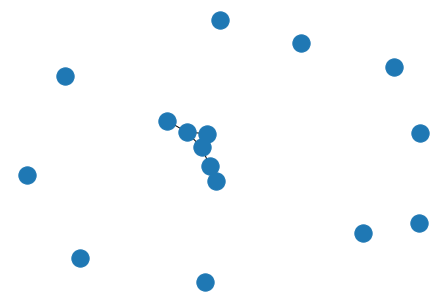

In [30]:
nx.draw(G)

In [36]:
cuautores = df[df["id_article"].isin(list(new_df["id_article"]))]

In [38]:
cuautores.reset_index(drop=True,inplace=True)

In [43]:
autores = list(set(cuautores["author"].values))

In [44]:
from collections import defaultdict
dict_authors_pubs =defaultdict(list)
for index, row in new_df.iterrows():
    dict_authors_pubs[row['id_article']].append(row['author'])

list_edges = []
list_edges.append("source,target\n")

for id_article, list_authors in dict_authors_pubs.items():
    for i in range(0,len(list_authors)):
        for j in range(i+1,len(list_authors)):
            list_edges.append(str(list_authors[i]).strip()+","+str(list_authors[j]).strip()+"\n")

with open("2015_2020_edges_total.csv", "w") as f:
        for renglon in list_edges:
                f.write(renglon)

In [46]:
total = pd.read_csv("2015_2020_edges_total.csv")

In [47]:
total = total.drop_duplicates()

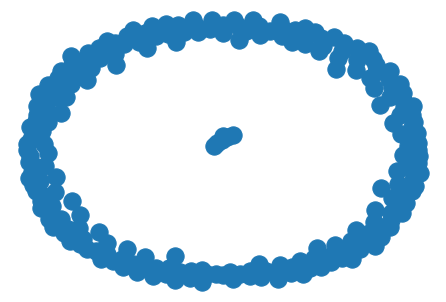

In [51]:
G = nx.Graph()

G.add_nodes_from(autores)

G.add_edges_from(total.values)

nx.draw(G)